# The case is just for fun, I will try to predict what year of the car was made based on the data provided.
## Here is my code.

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [3]:
#read the dataset
data = pd.read_csv('/Users/haitonghuang/Downloads/Quikr_car.csv')

In [4]:
data

,Unnamed: 0,Name,Label,Location,Price,Kms_driven,Fuel_type,Owner,Year,Company
0,0,Ford Figo Duratec Petrol EXI 1.2 - 2015,PLATINUM,Bangalore,"₹3,80,000","35,056 kms",Petrol,NaN,2015,Ford
1,1,Maruti Suzuki Wagon R VXI BS IV - 2016,PLATINUM,Bangalore,"₹4,65,000","44,000 kms",Petrol,NaN,2016,Maruti
2,2,Hyundai Creta 1.6 SX PLUS AUTO PETROL - 2018,PLATINUM,Bangalore,"₹13,50,000","42,917 kms",Petrol,NaN,2018,Hyundai
3,3,Hyundai Venue - 2019,PLATINUM,Chennai,"₹10,19,699","16,112 kms",Petrol,2nd Owner,2019,Hyundai
4,4,Honda Jazz - 2017,PLATINUM,Pune,"₹7,13,499","30,988 kms",Petrol,2nd Owner,2017,Honda
...,...,...,...,...,...,...,...,...,...,...
1027,1027,Hyundai i10 Magna 1.2 - 2014,GOLD,Bangalore,"₹2,29,000","65,000 kms",Petrol,1st Owner,2014,Hyundai
1028,1028,Maruti Suzuki Alto K10 LXi CNG - 2014,GOLD,Bangalore,"₹2,75,000","60,000 kms",Petrol,NaN,2014,Maruti
1029,1029,Jeep Compass Limited 2.0 Diesel - 2017,GOLD,Mahasamund,"₹17,50,000","31,000 kms",Diesel,1st Owner,2017,Jeep
1030,1030,Jeep Compass Limited 2.0 Diesel - 2017,GOLD,Bilaspur,"₹17,50,000","31,000 kms",Diesel,1st Owner,2017,Jeep


In [5]:
#data['Name'] = data['Name'].str.split('-').str[0]

In [6]:
data.head()

,Unnamed: 0,Name,Label,Location,Price,Kms_driven,Fuel_type,Owner,Year,Company
0,0,Ford Figo Duratec Petrol EXI 1.2 - 2015,PLATINUM,Bangalore,"₹3,80,000","35,056 kms",Petrol,NaN,2015,Ford
1,1,Maruti Suzuki Wagon R VXI BS IV - 2016,PLATINUM,Bangalore,"₹4,65,000","44,000 kms",Petrol,NaN,2016,Maruti
2,2,Hyundai Creta 1.6 SX PLUS AUTO PETROL - 2018,PLATINUM,Bangalore,"₹13,50,000","42,917 kms",Petrol,NaN,2018,Hyundai
3,3,Hyundai Venue - 2019,PLATINUM,Chennai,"₹10,19,699","16,112 kms",Petrol,2nd Owner,2019,Hyundai
4,4,Honda Jazz - 2017,PLATINUM,Pune,"₹7,13,499","30,988 kms",Petrol,2nd Owner,2017,Honda


In [9]:
data = data.rename(columns={data.columns[0]: 'number'})
data

,number,Name,Label,Location,Price,Kms_driven,Fuel_type,Owner,Year,Company
0,0,Ford Figo Duratec Petrol EXI 1.2 - 2015,PLATINUM,Bangalore,"₹3,80,000","35,056 kms",Petrol,NaN,2015,Ford
1,1,Maruti Suzuki Wagon R VXI BS IV - 2016,PLATINUM,Bangalore,"₹4,65,000","44,000 kms",Petrol,NaN,2016,Maruti
2,2,Hyundai Creta 1.6 SX PLUS AUTO PETROL - 2018,PLATINUM,Bangalore,"₹13,50,000","42,917 kms",Petrol,NaN,2018,Hyundai
3,3,Hyundai Venue - 2019,PLATINUM,Chennai,"₹10,19,699","16,112 kms",Petrol,2nd Owner,2019,Hyundai
4,4,Honda Jazz - 2017,PLATINUM,Pune,"₹7,13,499","30,988 kms",Petrol,2nd Owner,2017,Honda
...,...,...,...,...,...,...,...,...,...,...
1027,1027,Hyundai i10 Magna 1.2 - 2014,GOLD,Bangalore,"₹2,29,000","65,000 kms",Petrol,1st Owner,2014,Hyundai
1028,1028,Maruti Suzuki Alto K10 LXi CNG - 2014,GOLD,Bangalore,"₹2,75,000","60,000 kms",Petrol,NaN,2014,Maruti
1029,1029,Jeep Compass Limited 2.0 Diesel - 2017,GOLD,Mahasamund,"₹17,50,000","31,000 kms",Diesel,1st Owner,2017,Jeep
1030,1030,Jeep Compass Limited 2.0 Diesel - 2017,GOLD,Bilaspur,"₹17,50,000","31,000 kms",Diesel,1st Owner,2017,Jeep


In [10]:
data = data[['number','Kms_driven','Year','Label','Location','Company','Price']]
data['Price'] = data['Price'].str.replace(',', '')
data['Price'] = data['Price'].str.replace('₹', '')


data['Kms_driven'] = data['Kms_driven'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
data

/var/folders/vm/t0kfdtyd4j976j7k67x7nvpw0000gn/T/ipykernel_47054/2250246140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price'] = data['Price'].str.replace(',', '')
/var/folders/vm/t0kfdtyd4j976j7k67x7nvpw0000gn/T/ipykernel_47054/2250246140.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price'] = data['Price'].str.replace('₹', '')
/var/folders/vm/t0kfdtyd4j976j7k67x7nvpw0000gn/T/ipykernel_47054/2250246140.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

,number,Kms_driven,Year,Label,Location,Company,Price
0,0,35056,2015,PLATINUM,Bangalore,Ford,380000
1,1,44000,2016,PLATINUM,Bangalore,Maruti,465000
2,2,42917,2018,PLATINUM,Bangalore,Hyundai,1350000
3,3,16112,2019,PLATINUM,Chennai,Hyundai,1019699
4,4,30988,2017,PLATINUM,Pune,Honda,713499
...,...,...,...,...,...,...,...
1027,1027,65000,2014,GOLD,Bangalore,Hyundai,229000
1028,1028,60000,2014,GOLD,Bangalore,Maruti,275000
1029,1029,31000,2017,GOLD,Mahasamund,Jeep,1750000
1030,1030,31000,2017,GOLD,Bilaspur,Jeep,1750000


### Here we have to label our category columns in to numbers using Label Encoder from sklearn ###

In [32]:
le = LabelEncoder()

x = le.fit_transform(data['Location'])
y = le.fit_transform(data['Label'])
z = le.fit_transform(data['Company'])

In [33]:
#make a dataframe
data_new_n = pd.DataFrame(data= (x,y,z))
data_new_n

,0,1,2,3,4,5,6,7,8,9,...,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031
0,2,2,2,7,33,33,33,33,33,33,...,7,33,36,36,9,2,2,25,4,16
1,1,1,1,1,1,1,1,1,1,1,...,1,1,0,0,0,0,0,0,0,0
2,5,14,7,7,6,7,14,22,6,7,...,14,5,13,14,14,7,14,9,9,9


In [34]:
#transpose the data
data_new_n = np.transpose(data_new_n)
data_new_n

,0,1,2
0,2,1,5
1,2,1,14
2,2,1,7
3,7,1,7
4,33,1,6
...,...,...,...
1027,2,0,7
1028,2,0,14
1029,25,0,9
1030,4,0,9


In [35]:
a = data['number']
a = a.to_frame()
a

,number
0,0
1,1
2,2
3,3
4,4
...,...
1027,1027
1028,1028
1029,1029
1030,1030


In [36]:
# Merge all two datasets on the column number
data_new_n = data_new_n.join(a)
data_new_n
data_2 = pd.merge(data,data_new_n,how='outer',on='number')

In [37]:
data_2

,number,Kms_driven,Year,Label,Location,Company,Price,0,1,2
0,0,35056,2015,PLATINUM,Bangalore,Ford,380000,2,1,5
1,1,44000,2016,PLATINUM,Bangalore,Maruti,465000,2,1,14
2,2,42917,2018,PLATINUM,Bangalore,Hyundai,1350000,2,1,7
3,3,16112,2019,PLATINUM,Chennai,Hyundai,1019699,7,1,7
4,4,30988,2017,PLATINUM,Pune,Honda,713499,33,1,6
...,...,...,...,...,...,...,...,...,...,...
1027,1027,65000,2014,GOLD,Bangalore,Hyundai,229000,2,0,7
1028,1028,60000,2014,GOLD,Bangalore,Maruti,275000,2,0,14
1029,1029,31000,2017,GOLD,Mahasamund,Jeep,1750000,25,0,9
1030,1030,31000,2017,GOLD,Bilaspur,Jeep,1750000,4,0,9


In [53]:
#change column names and drop the useless ones 
data_final = data_2.rename(columns={0: 'location',1:'label',2:'company'})
data_final = data_final.drop(columns=['Location','Label','Company','number'])
data_final

,Kms_driven,Year,Price,location,label,company
0,35056,2015,380000,2,1,5
1,44000,2016,465000,2,1,14
2,42917,2018,1350000,2,1,7
3,16112,2019,1019699,7,1,7
4,30988,2017,713499,33,1,6
...,...,...,...,...,...,...
1027,65000,2014,229000,2,0,7
1028,60000,2014,275000,2,0,14
1029,31000,2017,1750000,25,0,9
1030,31000,2017,1750000,4,0,9


In [54]:
data.dtypes

number         int64
Kms_driven     int64
Year           int64
Label         object
Location      object
Company       object
Price         object
dtype: object

In [61]:
data_final['Price'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1027    False
1028    False
1029    False
1030    False
1031    False
Name: Price, Length: 1026, dtype: bool

In [62]:
data_final = data_final[data_final.Price != 'Ask For Price']
data_final

,Kms_driven,Year,Price,location,label,company
0,35056,2015,380000,2,1,5
1,44000,2016,465000,2,1,14
2,42917,2018,1350000,2,1,7
3,16112,2019,1019699,7,1,7
4,30988,2017,713499,33,1,6
...,...,...,...,...,...,...
1027,65000,2014,229000,2,0,7
1028,60000,2014,275000,2,0,14
1029,31000,2017,1750000,25,0,9
1030,31000,2017,1750000,4,0,9


In [68]:
data_final['Price']=data_final['Price'].astype(float)
data_final['location']=data_final['location'].astype(float)
data_final['label']=data_final['label'].astype(float)
data_final['company']=data_final['company'].astype(float)

In [70]:
data_final.dtypes

Kms_driven      int64
Year            int64
Price         float64
location      float64
label         float64
company       float64
dtype: object

In [ ]:
data_final

,Kms_driven,Year,Price,location,label,company
0,35056,2015,380000.0,2.0,1.0,5.0
1,44000,2016,465000.0,2.0,1.0,14.0
2,42917,2018,1350000.0,2.0,1.0,7.0
3,16112,2019,1019699.0,7.0,1.0,7.0
4,30988,2017,713499.0,33.0,1.0,6.0
...,...,...,...,...,...,...
1027,65000,2014,229000.0,2.0,0.0,7.0
1028,60000,2014,275000.0,2.0,0.0,14.0
1029,31000,2017,1750000.0,25.0,0.0,9.0
1030,31000,2017,1750000.0,4.0,0.0,9.0


### Here Let's scaler the data

In [111]:
standard_scaler = StandardScaler()
data_final = standard_scaler.fit_transform(data_final)

In [118]:
data_final = pd.DataFrame(data_final)

In [121]:
data_final.columns = ['Kms_driven','Year','Price','location','label','company']

In [122]:
data_final

,Kms_driven,Year,Price,location,label,company
0,-0.399836,-0.238104,-0.569072,-1.027667,0.702460,-1.302507
1,-0.165236,0.055873,-0.410848,-1.027667,0.702460,0.378229
2,-0.193643,0.643826,1.236542,-1.027667,0.702460,-0.929010
3,-0.896734,0.937803,0.621701,-0.654221,0.702460,-0.929010
4,-0.506539,0.349849,0.051722,1.287696,0.702460,-1.115759
...,...,...,...,...,...,...
1021,0.385591,-0.532081,-0.850152,-1.027667,-1.423569,-0.929010
1022,0.254441,-0.532081,-0.764525,-1.027667,-1.423569,0.378229
1023,-0.506224,0.349849,1.981125,0.690183,-1.423569,-0.555513
1024,-0.506224,0.349849,1.981125,-0.878289,-1.423569,-0.555513


#### **Let's store the data in forms of dependent and independent variables**

In [123]:
X = data_final.loc[:, data_final.columns != 'Year'].values
Y = data_final.loc[:, 'Year'].values

#### **Split the dataset into traning and testing dataset**

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)

#### **Import the Decision Tree Regressor**

In [125]:
from sklearn.tree import DecisionTreeRegressor

DtReg = DecisionTreeRegressor(max_depth = 5, random_state = 0)

DtReg.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

#### **Predicted Year from test dataset**

In [126]:
y_predict = DtReg.predict((X_test))
plt.figure(figsize=(15, 20))
y_predict

array([ 1.08190896,  0.56829042,  0.24609295,  0.34984942, -0.23056604,
        0.15576774,  0.34984942,  0.15576774,  0.56829042,  0.15576774,
       -0.13031246, -0.13031246, -0.23056604,  0.56829042, -0.23056604,
        0.56829042,  0.34984942,  0.56829042,  0.15576774, -0.82605724,
        0.56829042,  0.34984942, -0.23056604,  0.15576774,  0.34984942,
       -0.75256307,  0.56829042,  0.34984942, -0.75256307, -0.23056604,
       -0.23056604,  0.15576774,  0.24609295,  0.56829042,  1.08190896,
        0.24609295, -1.63062495,  0.56829042,  0.24609295, -3.49446082,
        0.15576774,  0.15576774,  0.56829042,  0.56829042,  0.34984942,
       -0.46675243,  0.15576774,  0.56829042,  1.08190896,  0.56829042,
        0.24609295,  0.15576774, -0.82605724,  0.56829042,  0.56829042,
        0.56829042,  0.56829042,  1.08190896, -0.13031246,  0.34984942,
        0.15576774, -0.23056604, -0.46675243,  1.08190896,  0.34984942,
       -0.23056604, -1.1515314 ,  0.15576774, -0.46675243, -1.63

<Figure size 1080x1440 with 0 Axes>

## **Get the R square**

In [127]:
from sklearn import metrics
r_square = metrics.r2_score(Y_test, y_predict)
print('R-Square Error associated with Decision Tree Regression is:',r_square)

R-Square Error associated with Decision Tree Regression is: 0.6631528753439542


##### **The R square indicates the accuracy of our prediction. Here, very sad our R square is showing around 70% accuracy**

In [128]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_predict)))

Mean Absolute Error: 0.42627818420274183
Mean Squared Error: 0.33899617762003886
Root Mean Squared Error: 0.582233782616604


[Text(163.9125, 199.32, 'X[1] <= -0.779\nmse = 0.997\nsamples = 718\nvalue = 0.005'),
 Text(82.305, 163.07999999999998, 'X[1] <= -0.955\nmse = 1.31\nsamples = 61\nvalue = -2.069'),
 Text(44.64, 126.83999999999999, 'X[0] <= 0.189\nmse = 0.932\nsamples = 29\nvalue = -2.914'),
 Text(22.32, 90.6, 'X[1] <= -1.072\nmse = 0.394\nsamples = 6\nvalue = -1.61'),
 Text(11.16, 54.359999999999985, 'X[0] <= -0.467\nmse = 0.194\nsamples = 4\nvalue = -1.267'),
 Text(5.58, 18.119999999999976, 'mse = 0.0\nsamples = 1\nvalue = -0.532'),
 Text(16.740000000000002, 18.119999999999976, 'mse = 0.019\nsamples = 3\nvalue = -1.512'),
 Text(33.480000000000004, 54.359999999999985, 'X[2] <= 0.055\nmse = 0.086\nsamples = 2\nvalue = -2.296'),
 Text(27.9, 18.119999999999976, 'mse = 0.0\nsamples = 1\nvalue = -2.59'),
 Text(39.06, 18.119999999999976, 'mse = 0.0\nsamples = 1\nvalue = -2.002'),
 Text(66.96000000000001, 90.6, 'X[1] <= -1.103\nmse = 0.513\nsamples = 23\nvalue = -3.255'),
 Text(55.8, 54.359999999999985, 'X[0]

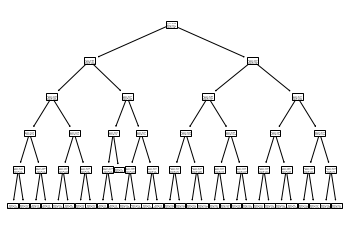

In [129]:
from sklearn import tree
tree.plot_tree(DtReg)

### The code below will generate us a dot file, then copy the code within the dot file and go to http://www.webgraphviz.com/ paste the code in the column, so that we can see our plot clearly.


In [130]:
from sklearn.tree import export_graphviz

In [131]:
export_graphviz(DtReg, out_file = 'dtregression.dot' ,
                feature_names = ['Kms_driven','Price','location','label','company'])

# Now I will try to use Random Forest to perform the same prediction again and see if we can get a hight accuracy #

In [132]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  accuracy_score

In [134]:
rfr =RandomForestRegressor(n_estimators=100,
                            random_state=0)

In [135]:
rfr.fit(X_train,Y_train)
rfr_y_pred = rfr.predict(X_test)
r_square = metrics.r2_score(Y_test, rfr_y_pred)
print('R-Square Error associated with Decision Tree Regression is:',r_square)

R-Square Error associated with Decision Tree Regression is: 0.7332958633582867


### Here with randomc forest and bootstrap for 100 times we got a higher accuracy on the prediction 

In [136]:
rfr.estimators_

[DecisionTreeRegressor(max_features='auto', random_state=209652396),
 DecisionTreeRegressor(max_features='auto', random_state=398764591),
 DecisionTreeRegressor(max_features='auto', random_state=924231285),
 DecisionTreeRegressor(max_features='auto', random_state=1478610112),
 DecisionTreeRegressor(max_features='auto', random_state=441365315),
 DecisionTreeRegressor(max_features='auto', random_state=1537364731),
 DecisionTreeRegressor(max_features='auto', random_state=192771779),
 DecisionTreeRegressor(max_features='auto', random_state=1491434855),
 DecisionTreeRegressor(max_features='auto', random_state=1819583497),
 DecisionTreeRegressor(max_features='auto', random_state=530702035),
 DecisionTreeRegressor(max_features='auto', random_state=626610453),
 DecisionTreeRegressor(max_features='auto', random_state=1650906866),
 DecisionTreeRegressor(max_features='auto', random_state=1879422756),
 DecisionTreeRegressor(max_features='auto', random_state=1277901399),
 DecisionTreeRegressor(max_

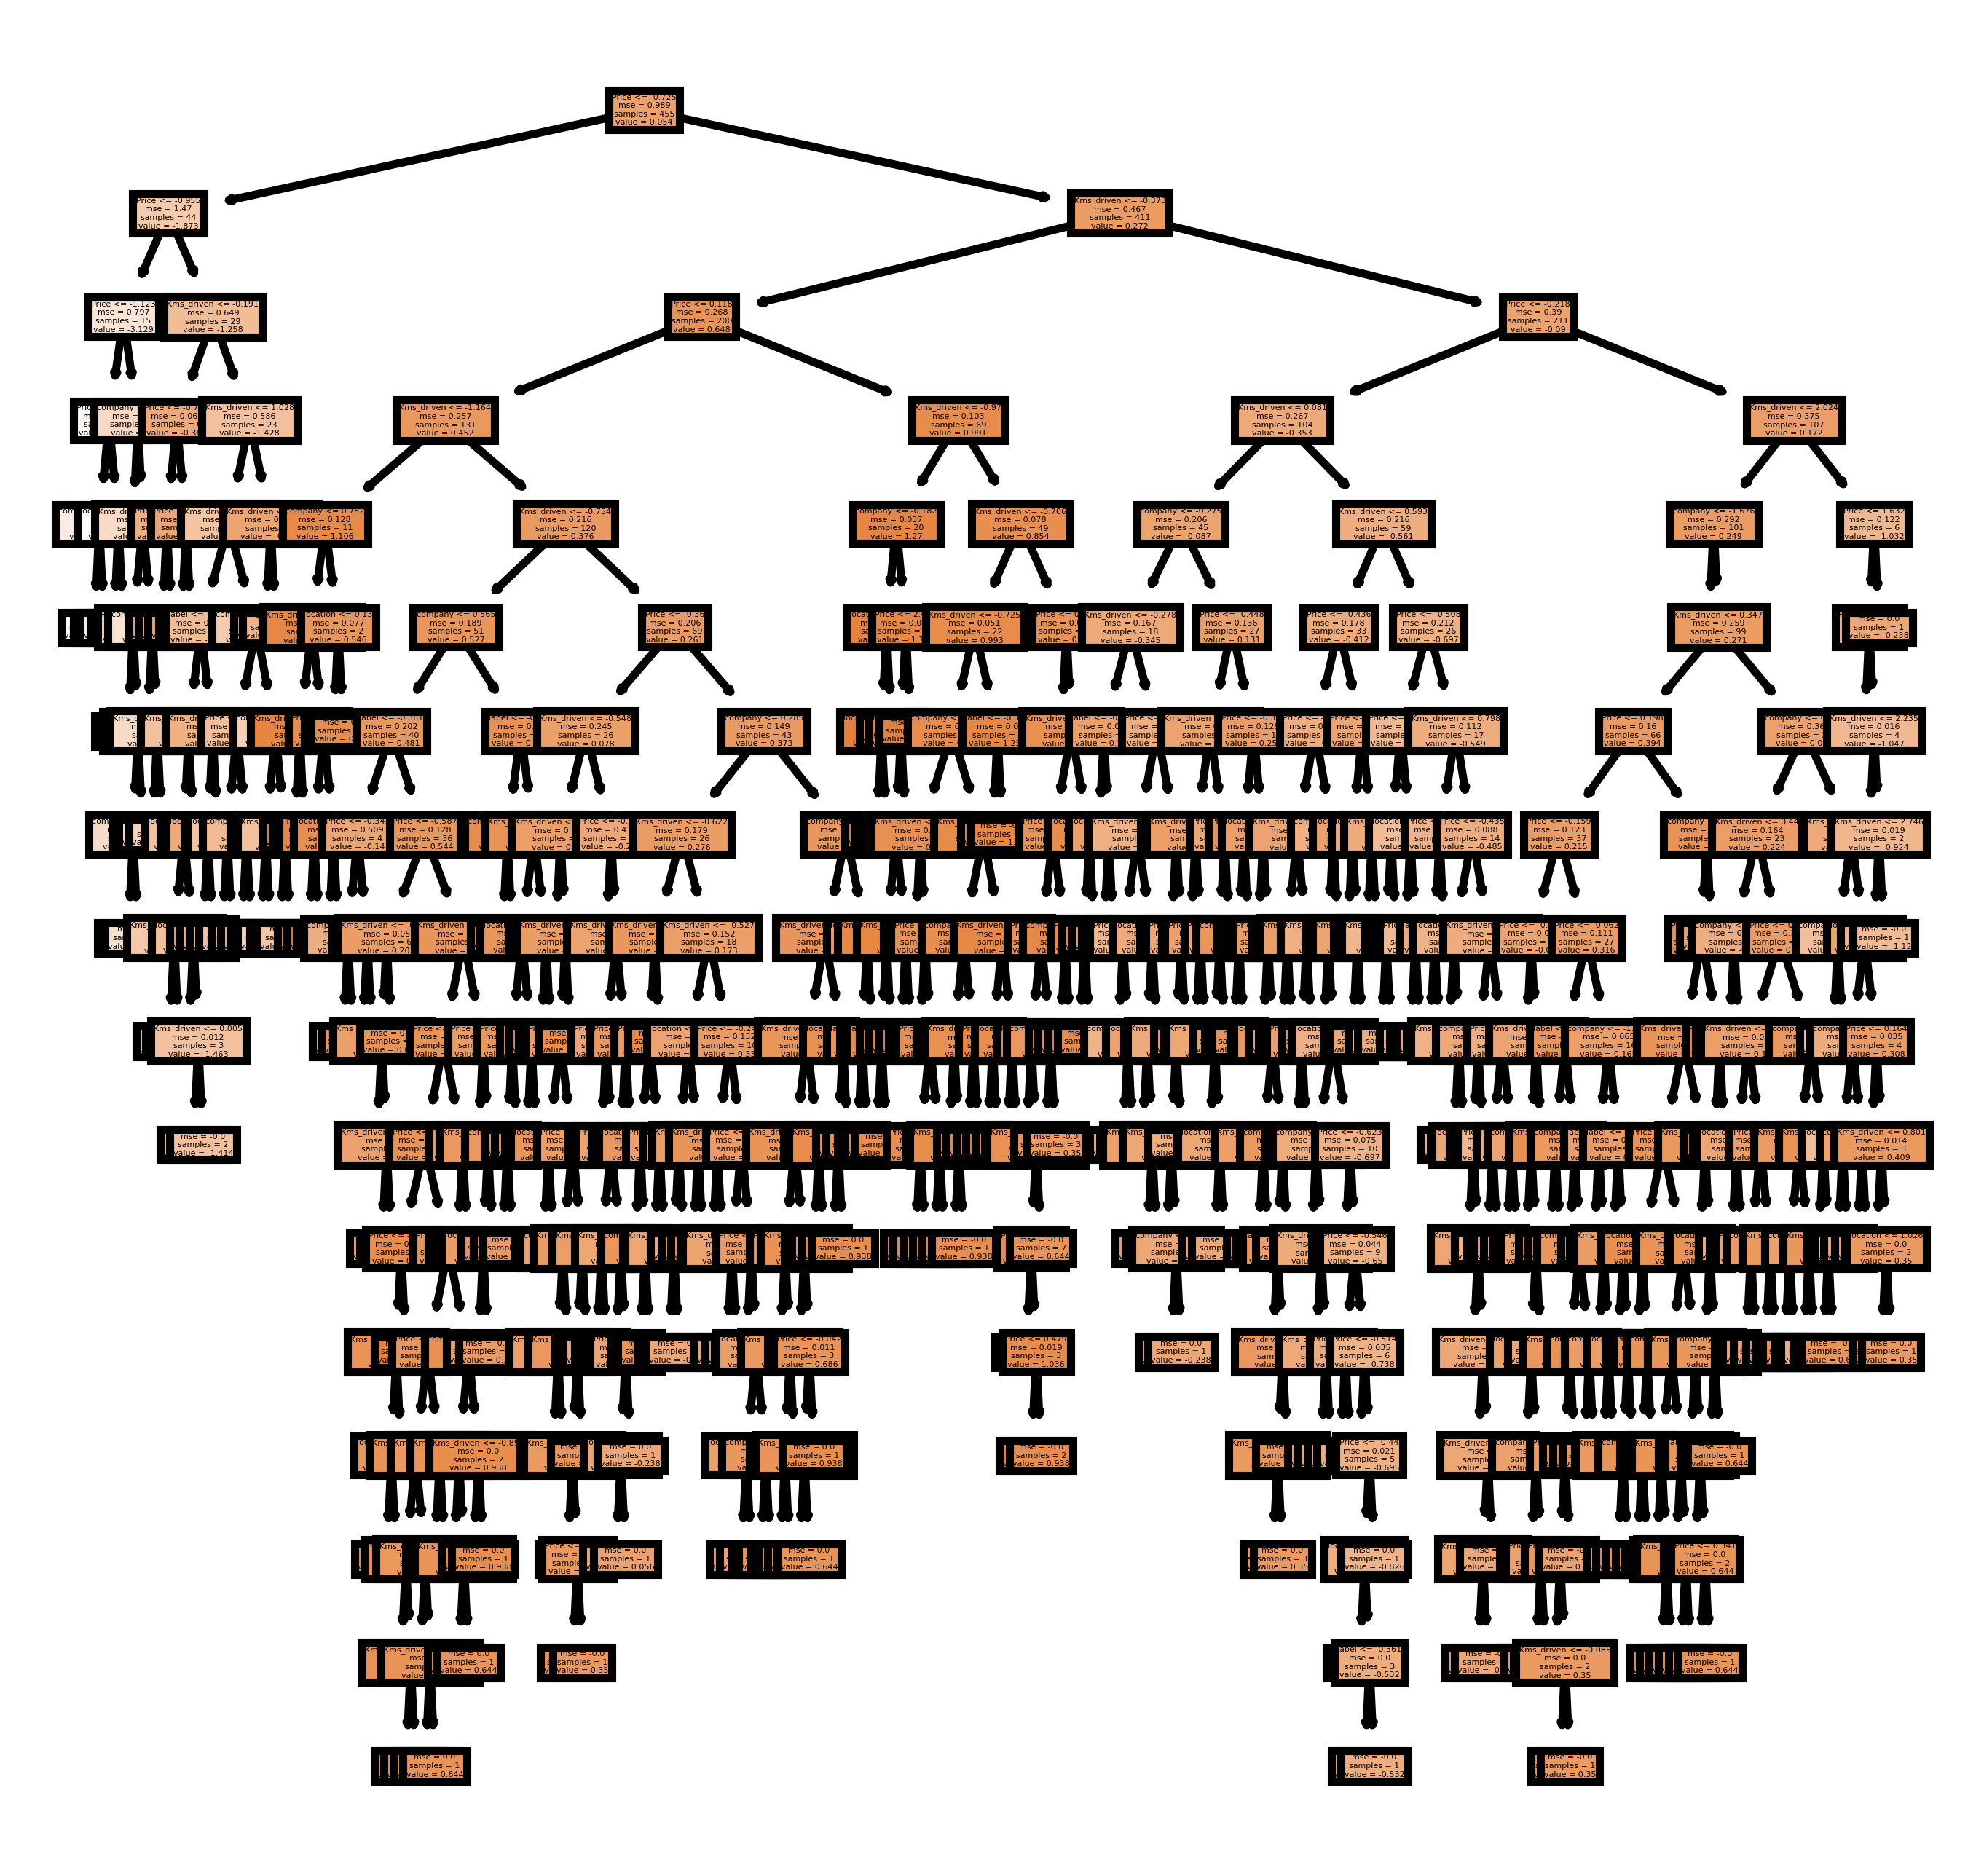

In [140]:
fn=['Kms_driven','Price','location','label','company']
cn=Y
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rfr.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree.png')

### By inputing Km_driven, price, location, label, company into the model will generate a prediction of the year of the car.

In [ ]:
predictionDT = DtReg.predict([[]])
prediction

In [ ]:
predictionRF = rfr.predict()